You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
    Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [3]:
df=pd.read_csv("E:\PW DATA SCIENCE\DESECION TREE\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
df.sum()

Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
dtype: float64

In [9]:
df.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary

<Axes: >

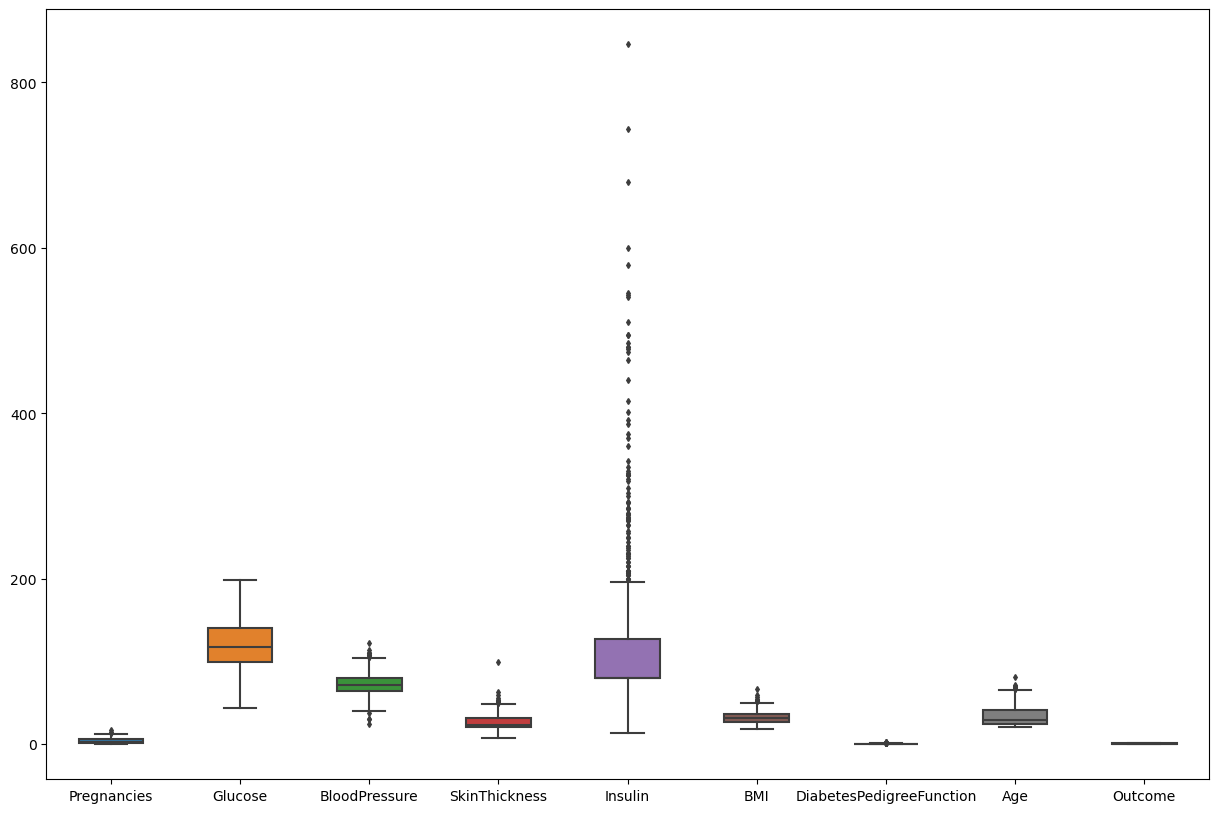

In [16]:
# now cheking for outlier
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax,fliersize=3)

In [17]:
# segrtae the dependent and independent variable
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [18]:
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

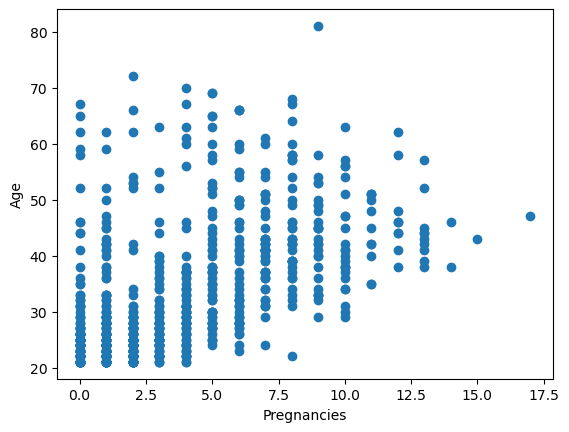

In [20]:
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.scatter(df['Pregnancies'],df['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

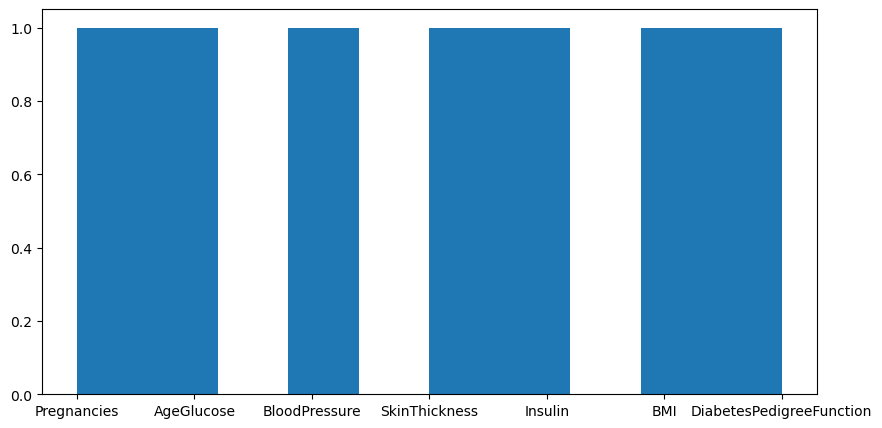

In [21]:
plt.figure(figsize=(10,5))
plt.hist([['Pregnancies','Age''Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']])
plt.show

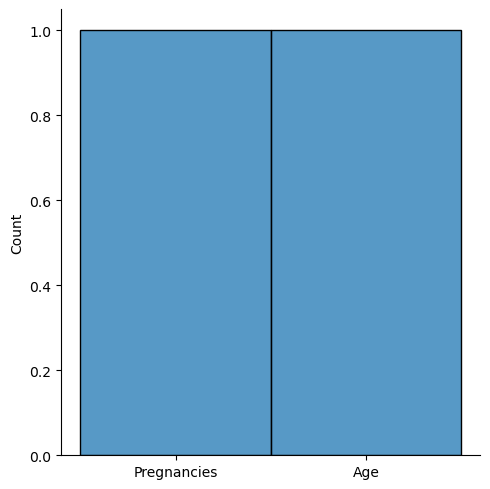

In [22]:
sns.displot(['Pregnancies','Age'])

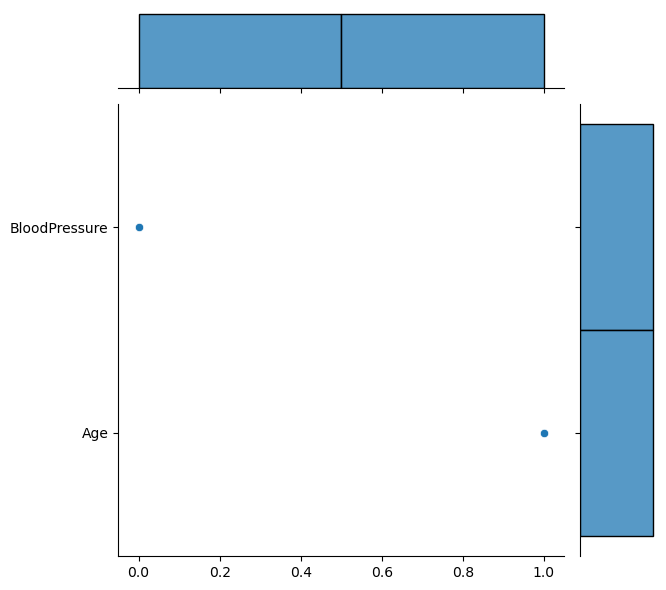

In [23]:
sns.jointplot(['BloodPressure','Age'])

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [24]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,20.536458,79.799479,22.500000,0.142,33
127,1,118.0,58.0,36.000000,94.000000,33.300000,0.261,23
564,0,91.0,80.0,20.536458,79.799479,32.400000,0.601,27
375,12,140.0,82.0,43.000000,325.000000,39.200000,0.528,58
663,9,145.0,80.0,46.000000,130.000000,37.900000,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.900000,0.171,63
192,7,159.0,66.0,20.536458,79.799479,30.400000,0.383,36
629,4,94.0,65.0,22.000000,79.799479,24.700000,0.148,21
559,11,85.0,74.0,20.536458,79.799479,30.100000,0.300,35


In [26]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.000000,79.799479,42.9,1.394,22
122,2,107.0,74.0,30.000000,100.000000,33.6,0.404,23
113,4,76.0,62.0,20.536458,79.799479,34.0,0.391,25
14,5,166.0,72.0,19.000000,175.000000,25.8,0.587,51
529,0,111.0,65.0,20.536458,79.799479,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124.0,72.0,20.536458,79.799479,27.6,0.368,29
301,2,144.0,58.0,33.000000,135.000000,31.6,0.422,25
382,1,109.0,60.0,8.000000,182.000000,25.4,0.947,21
140,3,128.0,78.0,20.536458,79.799479,21.1,0.268,55


In [27]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [28]:
x_train.shape,y_train.shape

((576, 8), (576,))

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
treeclasifier=DecisionTreeClassifier()

In [31]:
treeclasifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
127,1,118.0,58.0,36.000000,94.000000,33.3,0.261,23
564,0,91.0,80.0,20.536458,79.799479,32.4,0.601,27
375,12,140.0,82.0,43.000000,325.000000,39.2,0.528,58
663,9,145.0,80.0,46.000000,130.000000,37.9,0.637,40


In [33]:
y_train.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64

[Text(0.5537868632707775, 0.975, 'x[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.23760053619302948, 0.925, 'x[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.10120643431635389, 0.875, 'x[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.032171581769437, 0.825, 'x[0] <= 7.0\ngini = 0.037\nsamples = 107\nvalue = [105.0, 2.0]'),
 Text(0.021447721179624665, 0.775, 'x[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.010723860589812333, 0.725, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.032171581769437, 0.725, 'x[3] <= 13.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.021447721179624665, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04289544235924933, 0.675, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.04289544235924933, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17024128686327078, 0.825, 'x[1] <= 127.5\ngini = 0.324\nsamples = 128\nvalue = [10

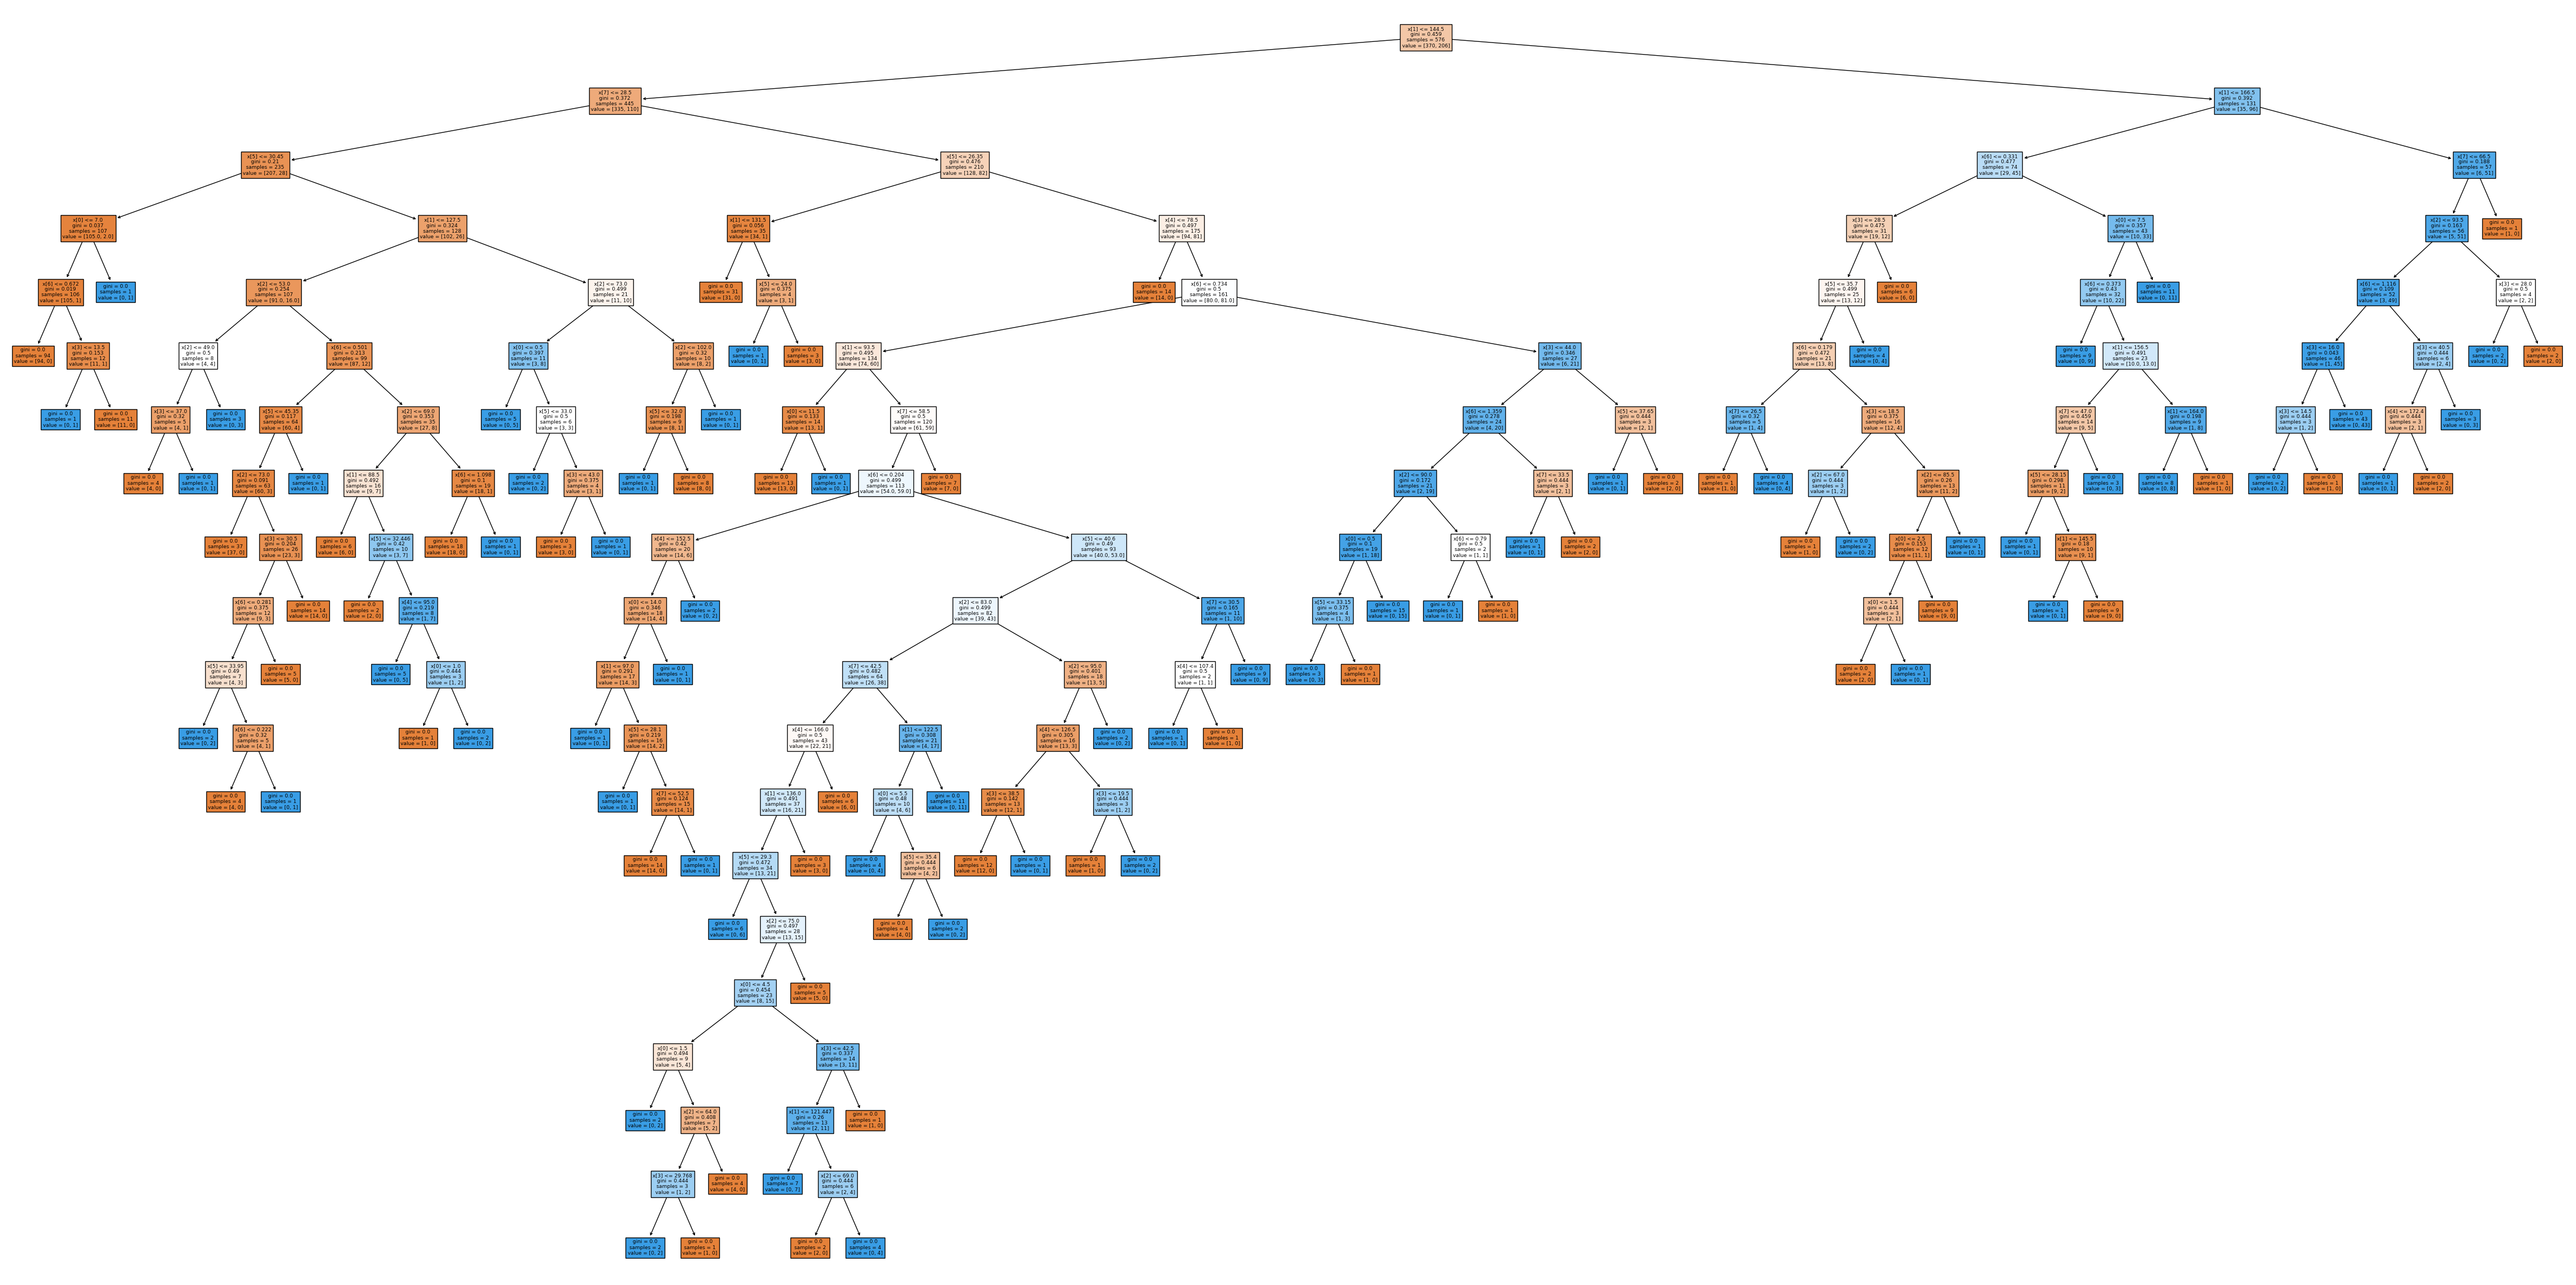

In [41]:
from sklearn import tree
plt.figure(figsize=(60,30))
tree.plot_tree(treeclasifier,filled=True)

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [51]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred=regressor.predict(x_test)

In [53]:
y_pred

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0.])

In [54]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [55]:
score

0.030303030303030276

In [56]:
## Hyperparameter tuning
parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [57]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [58]:
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [59]:
regressorcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [60]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [61]:
y_pred=regressorcv.predict(x_test)

In [62]:
y_pred

array([0.72413793, 0.15671642, 0.15671642, 0.86666667, 0.44954128,
       0.13861386, 0.86666667, 0.86666667, 0.15671642, 0.44954128,
       0.72413793, 0.86666667, 0.44954128, 0.15671642, 0.44954128,
       0.44954128, 0.86666667, 0.        , 0.44954128, 0.44954128,
       0.86666667, 0.15671642, 0.15671642, 0.40495868, 0.15671642,
       0.15671642, 0.15671642, 0.86666667, 0.13861386, 0.40495868,
       0.44954128, 0.15671642, 0.15671642, 0.15671642, 0.        ,
       0.40495868, 0.40495868, 0.13861386, 0.13861386, 0.13861386,
       0.15671642, 0.15671642, 0.44954128, 0.13861386, 0.40495868,
       0.15671642, 0.13861386, 0.13861386, 0.15671642, 0.15671642,
       0.40495868, 0.15671642, 0.86666667, 0.44954128, 0.15671642,
       0.13861386, 0.44954128, 0.13861386, 0.15671642, 0.40495868,
       0.40495868, 0.86666667, 0.13861386, 0.15671642, 0.72413793,
       0.86666667, 0.40495868, 0.40495868, 0.44954128, 0.40495868,
       0.13861386, 0.40495868, 0.13861386, 0.86666667, 0.72413

In [63]:
r2_score(y_pred,y_test)

-2.4070639828311973